# Recent Trends and Opportunities for Lyft Bay Wheels
## by Jerry Yip

## Investigation Overview

> In this investigation, I wanted to look at growth opportunities for Lyft's operation of the Bay Wheels bike sharing system.  I review lesser served groups in the context of the current ridership landscape and also analyze trends since Lyft assumed full operation of the bike sharing system from Ford in June of 2019.

## Dataset Overview

> The data consisted of rental and ridership attributes for approximately 3.7 million bike rentals on Lyft's (formerly Ford's) Bay Wheels bike sharing system from January 2018 to September 2019.  The attributes included details on rental location, duration, and date-time as well as additional anonymized information on riders such as gender, birth year, and subscribership status.  Nineteen data points were removed from the analysis as they corresponded to the operator's own test bike rentals.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_clean = pd.read_csv('lyft_bike_data_v2.csv')

In [17]:
# repeat steps to set appropriate datatypes (e.g. to datetime etc.)
bike_clean.start_time = pd.to_datetime(bike_clean.start_time)
bike_clean.end_time = pd.to_datetime(bike_clean.end_time)

bike_clean.member_birth_year = bike_clean.member_birth_year.astype('Int64')

bike_clean.member_gender = bike_clean.member_gender.astype('category')

bike_clean.bike_share_for_all_trip = bike_clean.bike_share_for_all_trip.astype('category')
bike_clean.user_type = bike_clean.user_type.astype('category')

area_order = ['San Francisco', 'East Bay', 'San Jose']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = area_order)
bike_clean['start_srv_area'] = bike_clean['start_srv_area'].astype(ordered_cat)
bike_clean['end_srv_area'] = bike_clean['end_srv_area'].astype(ordered_cat)

age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'not_provided']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = age_order )

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered=True, categories = day_order )
bike_clean['start_day'] = bike_clean['start_day'].astype(ordered_cat)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Bike Ridership by Time and Day

> The current landscape of Bay Wheels ridership is largely comprised of rides during weekday commute hours -- roughly 57% of such rides occur during this times.  Notice ridership is roughly twice as much on weekdays versus weekends, and that there is a bimodal distribution of bike ride times with peaks during morning and evening commute hours.

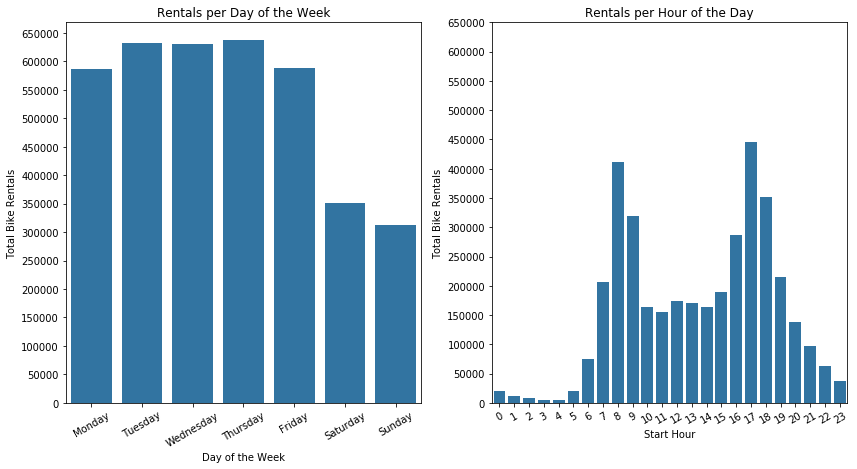

In [49]:
#Let's look at distribution of rides for day of the week by user type
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean, x='start_day', color = base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Day of the Week')
plt.xticks(rotation = 30)
plt.yticks(np.arange(0, 700000, 50000));

plt.subplot(1,2,2)
sns.countplot(data=bike_clean, x='start_hour', color = base_color, order = hour_order )
plt.xlabel('Start Hour')
plt.ylabel('Total Bike Rentals')
plt.title('Rentals per Hour of the Day')
plt.xticks(rotation = 30)
plt.yticks(np.arange(0, 700000, 50000));

## Distribution of Bike Ridership by demographics

> Next, looking at demographic breakdowns, we see that the large majority of riders are working age and male (regardless of age group). 

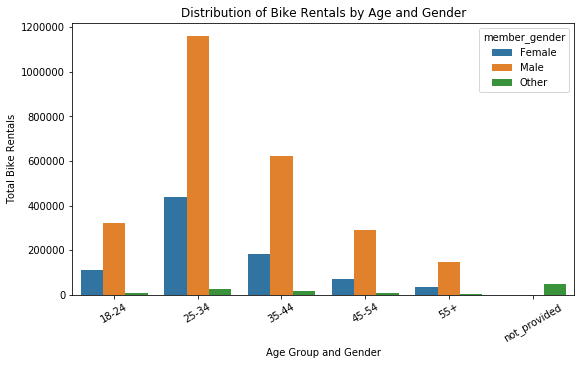

In [42]:
plt.figure(figsize=(9,5))
age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'not_provided']
sns.countplot(data = bike_clean, x='age_group', hue='member_gender', order = age_order);

plt.ylabel('Total Bike Rentals')
plt.xlabel('Age Group and Gender')
plt.title('Distribution of Bike Rentals by Age and Gender')
plt.xticks(rotation = 30);

## Distribution of Bike Ridership by Pricing Model
> Lastly, we breakdown ridership by user type and pricing - rides by monthly 'Subscribers' versus rides by one-off 'Customers'. Given a large percentage of rides are by daily commuters, we see a large percentage of rides are by monthly subscribers who pay a single monthly price for unlimited rides as compared to the small percentage of rides by non-subscribing customers who pay a small amount for each ride.

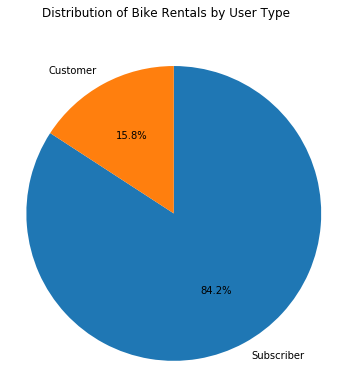

In [44]:
plt.figure(figsize=(9,6))
plt.suptitle('Distribution of Bike Rentals by User Type')
user_counts = bike_clean['user_type'].value_counts()
plt.pie(user_counts, labels = user_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False);
plt.axis('square');

# Bike Rental Duration by Pricing Model
> Looking across the two types of bike rental pricing models (subscribership and customer), we find the average bike rental durations vary greatly (much more than for the aforementioned demographics of gender and age).  Specifically, we find that non-subscriber 'Customer' rentals tend to maximize each ride as they pay the same price for up to 30 minutes, whereas subscribers ride for much shorter amounts of time.

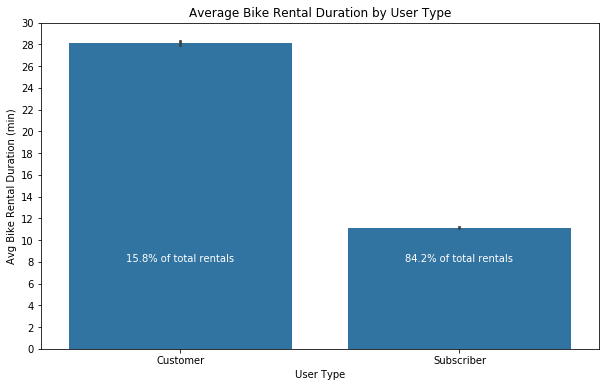

In [62]:
# Next, we'll try a bar plot of average rental duration by user type
plt.figure(figsize = (10, 6))
base_color = sns.color_palette()[0]

g=sns.barplot(data = bike_clean, x = 'user_type', y = 'duration_min', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Avg Bike Rental Duration (min)')
plt.title('Average Bike Rental Duration by User Type');
plt.yticks(np.arange(0, 31, 2));

# add annotations
n_points = bike_clean.shape[0]
user_counts = bike_clean['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}% of total rentals'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, 8, pct_string, ha = 'center', color = 'white');

# Growth Opportunities
> Given the typical customer persona is a working age male who commutes to work and has a subscription membership, it suggests there are opportunities to increase ridership in two key areas:
1. Female customers (of all age groups and ride types)
2. One-off rides (i.e. non-subscription 'Customer' rides) such as by tourists or the ad hoc user

# Recent Trends: Female Ridership
> Let's see how ridership has changed over time and in particular, with the transition of operations from Ford to Lyft starting in June 2019.  First, we look at the breakdown of female ridership over time.  

>**Analysis:** Whereas female ridership was increasing year-over-year for each month in early 2019, unfortunately it looks like ridership subsequently plateaued or declined when Lyft assumed bike sharing operations in June 2019.  
>**Conclusions:**  As it's only been a few months, and this same period coincided with two electric bike [recalls](https://www.theverge.com/2019/7/31/20749396/lyft-electric-bikes-pulled-san-francisco-battery-fires-motivate-bay-wheels), perhaps the verdict is still out.  Furthermore, ridership by customers who do not provide their gender increased dramatically in September (likely overlaps with increases in non-subscribing members), so it's too early to make a clear assessment, although there surely can be improvement in terms of pursuing this opportunity.

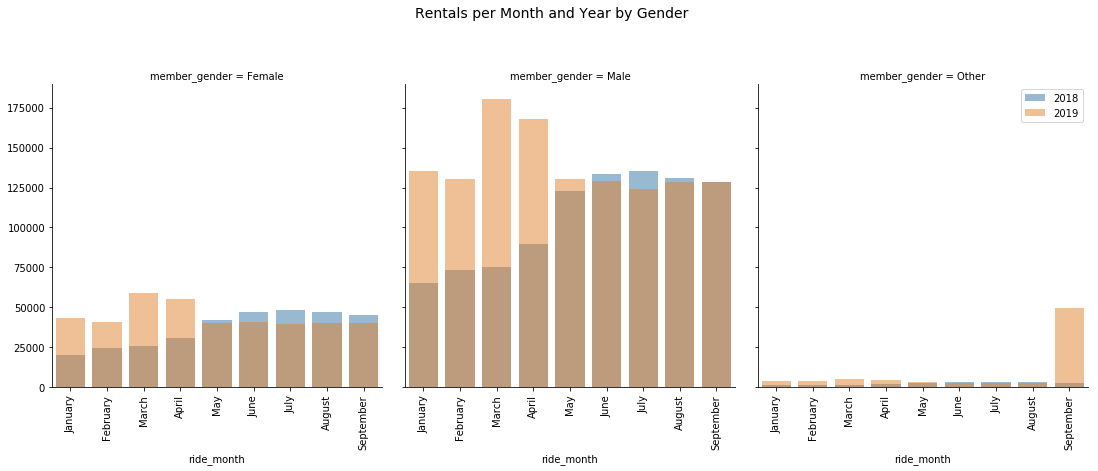

In [46]:
#First we'll look at Gender
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='member_gender', col_wrap = 3, height=6, aspect = 6/7)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Month and Year by Gender', size=14);

# Recent Trends: Non-subscription Rides
> **Analysis:**  Looking at subscription and non-subscription ridership overtime, we see a positive upward trend year-over-year for each month in ridership by non-subscribing customers, which although declines some during May, appears to subsequently accelerate after Lyft assumes operation from June - September.  At the same time, subscriber rides have also either increased year over year or largely stayed the same as the same month in the year prior.  
> **Conclusion:** It looks like the increased ridership by non-subscribing 'Customers' has not cannibalized ridership by subscribing members -- the overall pie (of bike rides) has increased under Lyft.

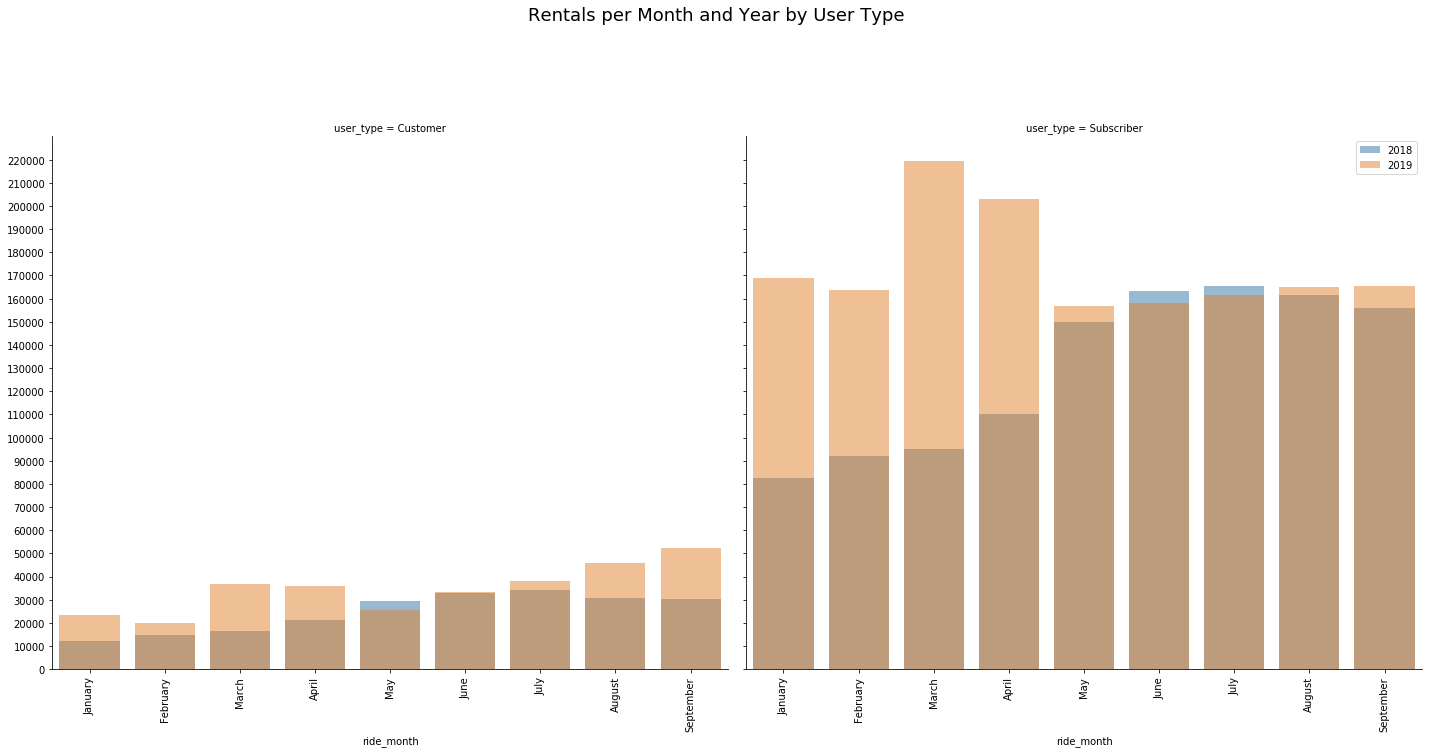

In [57]:
# Let's break down that year-over-year growth by User Type:
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='user_type', height=10, aspect = 6/6)
g.map(sns.countplot, 'ride_month', alpha = .5)
g.set_xticklabels(rotation=90)
#g.add_legend()
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Rentals per Month and Year by User Type', size=18)
plt.yticks(np.arange(0, 230000, 10000));
#plt.title('Rentals per Month and Year by Gender', size=14);

# Recent Trends: Revenue Implications

> Whereas non-subscriber 'Customer' rides has increased overall in 2019 and with Lyft taking over operations in June, we simultaneously see that the duration of such rides has decreased, driving down the average revenue per non-subscription ride from 5 dollars to 2 dollars.  
To elaborate, whereas in 2018 non-subscriber rides averaged between 30-40 minutes each month suggesting an average price of 5 dollars/ride as per Ford's 2018 [pricing](https://biketoeverything.com/2018/06/12/complete-san-francisco-bikeshare-review/), rides in 2019 consistenly averaged less than 30 each month suggesting a 2019 average of only 2 dollars/ride for such non-subscription rides as per both Ford and Lyft's [pricing](https://www.lyft.com/bikes/bay-wheels/pricing).  Meanwhile, subscription ride durations did not vary from year to year suggesting little to no change in revenue from a per ride perspective.  
>**Conclusion:** Given both subscriber and non-subscriber rides have increased in 2019, yet the average ride duration has stayed the same for subscribers and decreased for non-subscribers, it's not clear whether overall revenue has also increased in step with ridership numbers due to the different pricing for rides based on duration.

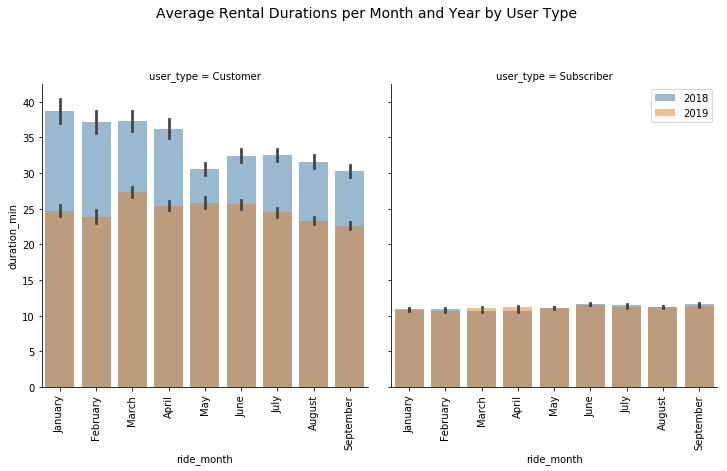

In [61]:
#Let's breakdown the trend in average rental durations by user_type
g = sns.FacetGrid(data = bike_clean, hue = 'ride_year', col='user_type', col_wrap = 2, height=6, aspect = 6/7)
g.map(sns.barplot, 'ride_month', 'duration_min', alpha = .5)
g.set_xticklabels(rotation=90)
plt.legend(loc='best')
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Average Rental Durations per Month and Year by User Type', size=14);